# Mall Customer Data HtH

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv")
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


<Figure size 1000x600 with 0 Axes>

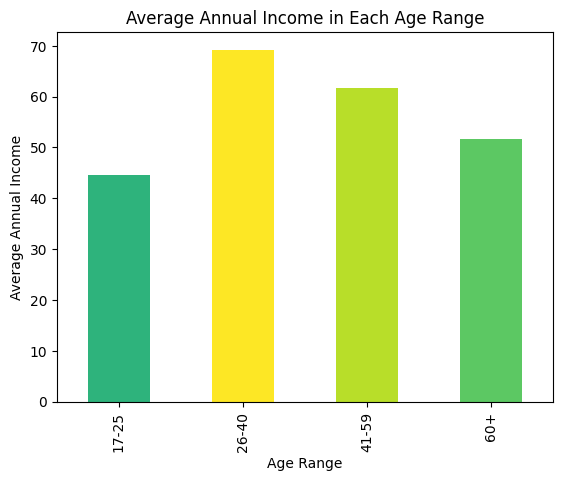

In [52]:
# 1. Typically what age group has the most annual income?
# Create age bins
age_bins = [17, 25, 40, 59, 200]
age_labels = ["17-25", "26-40", "41-59", "60+"]

# Cut the 'Age' column into bins
df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

income_means = df.groupby('AgeRange', observed=False)['Annual Income (k$)'].mean().reset_index()

# Create Column Plot
plt.figure(figsize=(10, 6))
income_means.plot(kind='bar', x='AgeRange', y='Annual Income (k$)', color=plt.cm.viridis(income_means['Annual Income (k$)'] / income_means['Annual Income (k$)'].max()), legend=False)

plt.title('Average Annual Income in Each Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Annual Income')
plt.show()

From this graph, it's shown that the people with the most income are people from 26-40 years old. Following them are the 41-59 year old group and the 60+ year-old group. Lastly, the 17-25 year old group is found to have on average the least amount of annual income. 16 and below were not included in this data set.

In [53]:
# What 5 people have the highest and lowest spending score?

highest_spenders = df.nlargest(5, 'Spending Score (1-100)')

lowest_spenders = df.nsmallest(5, 'Spending Score (1-100)')

print("Top 5 highest spenders:")
print(highest_spenders)

print("\nTop 5 lowest spenders:")
print(lowest_spenders)

Top 5 highest spenders:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
11           12  Female   35                  19                      99   
19           20  Female   35                  23                      98   
145         146    Male   28                  77                      97   
185         186    Male   30                  99                      97   
127         128    Male   40                  71                      95   

    AgeRange  
11     26-40  
19     26-40  
145    26-40  
185    26-40  
127    41-59  

Top 5 lowest spenders:
     CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
156         157   Male   37                  78                       1   
158         159   Male   34                  78                       1   
8             9   Male   64                  19                       3   
30           31   Male   60                  30                       4   
32           33   Male   53   

Looking at the data, it seems that the people with the top 5 spending scores are split relatively even between males and females, vary widely in annual income, and predominantly are in the 26-40 age range. On the other hand, the people with the 5 least spending scores are all male, vary in income, and vary in age group.

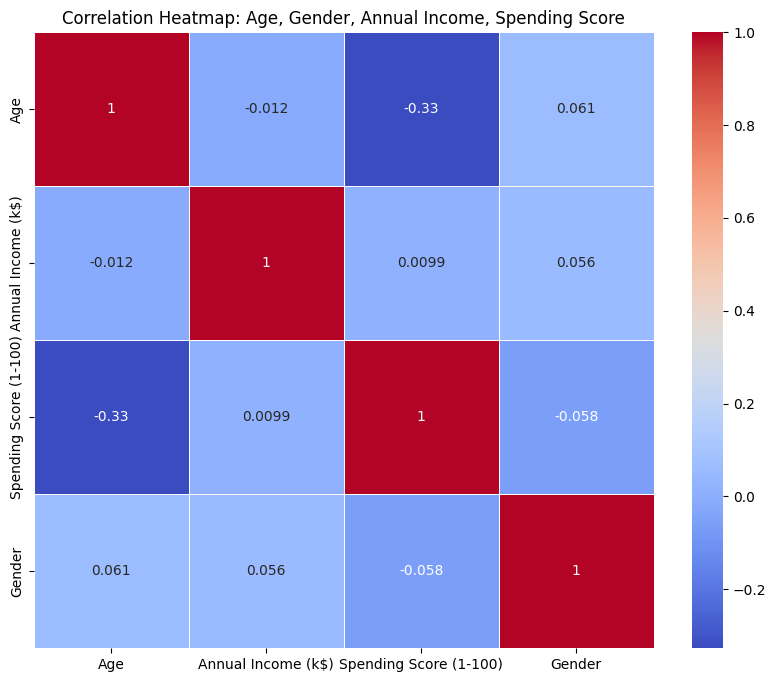

In [72]:
# What correlation does age, gender, and annual income have on spending score?

selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']


df_subset = df[selected_columns].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Map 'Gender' values to numerical values (e.g., 0 for Female, 1 for Male)
gender_mapping = {'Female': 0, 'Male': 1}
df_subset['Gender'] = df_subset['Gender'].map(gender_mapping)

# Calculate correlation matrix
correlation_matrix = df_subset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap: Age, Gender, Annual Income, Spending Score')
plt.show()

This heat map shows that as age increases, spending score decreases and vice versa. Other than that, nothing else has a strong corrolation to spending score, or any other metric.